In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Top 3 Similar Vectors:
Vector-9 → Similarity: 0.9762
Vector-3 → Similarity: 0.9451
Vector-4 → Similarity: 0.9190


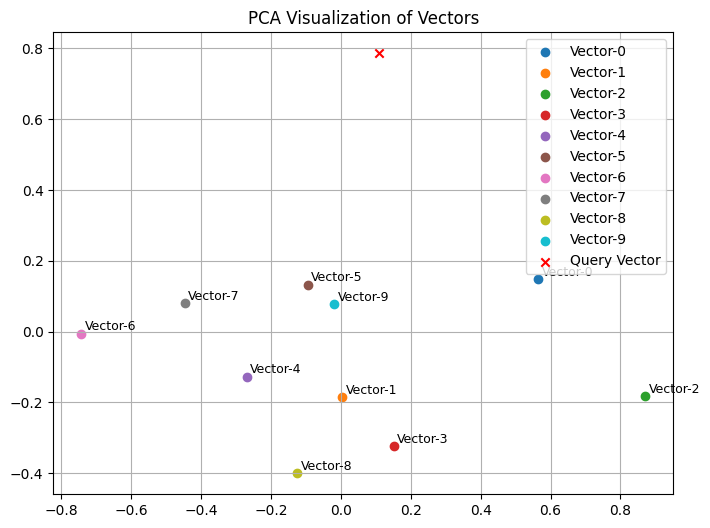

In [1]:
# ✅ Assignment-4: Mini Vector Store with Similarity Search (TinyVectorDB)

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

# 🔹 Step 1: Create the TinyVectorDB Class
class TinyVectorDB:
    def __init__(self):
        self.vectors = []
        self.labels = []

    def add(self, vector, label):
        self.vectors.append(vector)
        self.labels.append(label)

    def query(self, query_vector, top_k=3):
        if not self.vectors:
            return []
        sims = cosine_similarity([query_vector], self.vectors)[0]
        top_indices = np.argsort(sims)[-top_k:][::-1]
        results = [(self.labels[i], sims[i]) for i in top_indices]
        return results

# 🔹 Step 2: Create Dummy Vectors and Add to DB
db = TinyVectorDB()
np.random.seed(42)

for i in range(10):
    vec = np.random.rand(5)  # 5-dim vector
    db.add(vec, f"Vector-{i}")

# 🔹 Step 3: Query with a Random Vector
query_vec = np.random.rand(5)
results = db.query(query_vec, top_k=3)

print("Top 3 Similar Vectors:")
for label, score in results:
    print(f"{label} → Similarity: {score:.4f}")

# 🔹 Step 4 (Bonus): Visualize Vectors with PCA
all_vectors = np.array(db.vectors + [query_vec])
pca = PCA(n_components=2)
reduced = pca.fit_transform(all_vectors)

plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(reduced[i, 0], reduced[i, 1], label=db.labels[i])
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, db.labels[i], fontsize=9)

# Add Query vector
plt.scatter(reduced[-1, 0], reduced[-1, 1], color='red', marker='x', label='Query Vector')
plt.title("PCA Visualization of Vectors")
plt.legend()
plt.grid(True)
plt.show()


2025-06-29 18:08:12.286946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751220492.561968      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751220492.637719      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Top 3 Similar Sentences:
Arya Stark is a warrior. → Similarity: 0.5080
The king in the north. → Similarity: 0.5013
The iron throne awaits. → Similarity: 0.2815


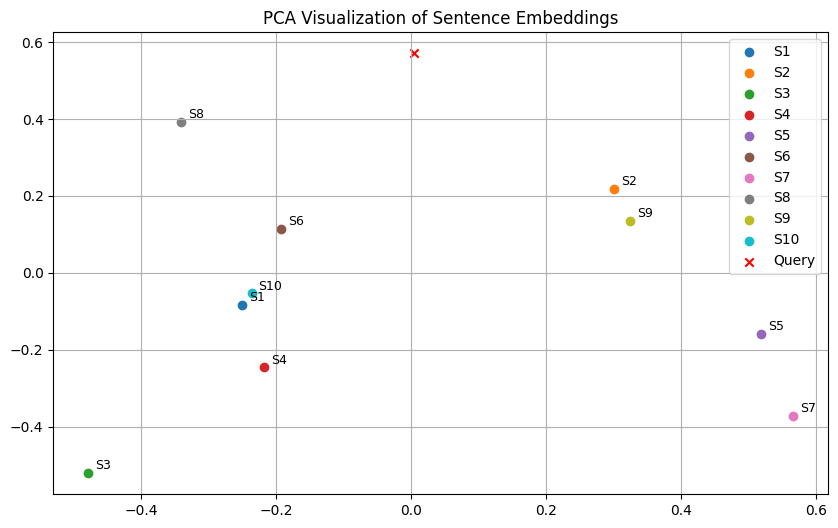

In [2]:
# ✅ Assignment-4: Mini Vector Store with Similarity Search (TinyVectorDB)

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
from sentence_transformers import SentenceTransformer

# 🔹 Step 1: Create the TinyVectorDB Class
class TinyVectorDB:
    def __init__(self):
        self.vectors = []
        self.labels = []

    def add(self, vector, label):
        self.vectors.append(vector)
        self.labels.append(label)

    def query(self, query_vector, top_k=3):
        if not self.vectors:
            return []
        sims = cosine_similarity([query_vector], self.vectors)[0]
        top_indices = np.argsort(sims)[-top_k:][::-1]
        results = [(self.labels[i], sims[i]) for i in top_indices]
        return results

# 🔹 Step 2: Use SentenceTransformer to Generate Vectors
model = SentenceTransformer('all-MiniLM-L6-v2')

sample_sentences = [
    "The king in the north.",
    "Winter is coming.",
    "The queen rules the kingdom.",
    "Dragons flew over the castle.",
    "A long night is near.",
    "Jon Snow knows nothing.",
    "The wall stands tall.",
    "Arya Stark is a warrior.",
    "White walkers are rising.",
    "The iron throne awaits."
]

embeddings = model.encode(sample_sentences)

db = TinyVectorDB()
for i, vec in enumerate(embeddings):
    db.add(vec, sample_sentences[i])

# 🔹 Step 3: Query with a Sentence
query_sentence = "A warrior is coming from the north."
query_vec = model.encode([query_sentence])[0]

results = db.query(query_vec, top_k=3)
print("\nTop 3 Similar Sentences:")
for label, score in results:
    print(f"{label} → Similarity: {score:.4f}")

# 🔹 Step 4: Visualize Vectors with PCA
all_vectors = np.vstack([embeddings, query_vec])
pca = PCA(n_components=2)
reduced = pca.fit_transform(all_vectors)

plt.figure(figsize=(10, 6))
for i in range(len(sample_sentences)):
    plt.scatter(reduced[i, 0], reduced[i, 1], label=f"S{i+1}")
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, f"S{i+1}", fontsize=9)

plt.scatter(reduced[-1, 0], reduced[-1, 1], color='red', marker='x', label='Query')
plt.title("PCA Visualization of Sentence Embeddings")
plt.legend()
plt.grid(True)
plt.show()

